# Sprint16 公開されている実装を動かす

## 準備

In [64]:
!pip install tensorflow==1.15.0

In [6]:
!pip install keras==2.2.4

     |████████████████████████████████| 317kB 2.7MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [1]:
import tensorflow
tensorflow.__version__

'1.15.0'

In [3]:
import keras
keras.__version__

'2.2.4'

In [0]:
!pip install kaggle

google mydriveにkaggleデータとgit_hubデータを入れる。

In [2]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
mkdir .kaggle

In [0]:
ls -a

./  ../  .config/  drive/  .kaggle/  sample_data/


In [0]:
cd drive/"My Drive"

/content/drive/My Drive


In [0]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json

token = {"username":"yottan","key":"dfedf02227773abd98d17984bb641c20"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
ls -a .kaggle

ls: cannot access '.kaggle': No such file or directory


In [0]:
mkdir　/root/.kaggle/

In [0]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [0]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [0]:
# kaggle APIコマンドが使えるかどうかを確認
!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       2476            True  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      18639            True  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       4561            True  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        325           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       2638            True  
competitive-data-science-predict-future-sales     2020-12-31 23:59:00  Playground           Kudos       6387   

In [3]:
# カレントディレクトリの変更
import os
os.chdir('/content/drive/My Drive/')
# カレントディレクトリの取得
print(os.getcwd())

FileNotFoundError: ignored

In [0]:
# simpsonデータセットのAPIコマンドでデータセットをダウンロードする
# APIコマンドはこちらのサイトを参照。https://www.kaggle.com/alexattia/the-simpsons-characters-dataset
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

the-simpsons-characters-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip /content/drive/'My Drive'/fasterRCNN/the-simpsons-characters-dataset.zip  -d Simpsons

In [0]:
!git clone https://github.com/duckrabbits/ObjectDetection.git

Cloning into 'ObjectDetection'...
remote: Enumerating objects: 28, done.
remote: Total 28 (delta 0), reused 0 (delta 0), pack-reused 28
Unpacking objects: 100% (28/28), done.


## 【問題1】学習と推定
READMEを参考に上記実装を動かしてください。

In [6]:
cd /content/drive/My Drive/ObjectDetection/

/content/drive/My Drive/ObjectDetection


In [8]:
cat README.md

# ObjectDetection

Kerasを利用したFaster R-CNN実装により物体検出を行います。

## クックスタート

Kaggleのシンプソンズデータセットで学習・推定を行う手順を説明します。

[Kaggle](https://www.kaggle.com/alexattia/the-simpsons-characters-dataset)

### データセットの用意

- Kaggleからダウンロードしたthe-simpsons-characters-dataset.zipを解凍します。
- simpsons_dataset.zipを解凍します。
- 解凍したsimpsons_datasetフォルダをプロジェクトフォルダ配下に格納します。
- annotation.txtもプロジェクトフォルダ配下に格納します。
 （kaggleからダウンロードしたannotation.txtではなく、ここにあるannotation.txtを使いましょう）

### 学習

以下のコマンドを実行してください。

`python train.py -p annotation.txt`

以下のように設定ファイルのパスが出力されるので記録してください。推定時に使います。

"""
path to config file : ./save/train_20190309-220050_config.pickle
"""

エポック数なども引数で変更できます。詳細はtrain.pyを参照してください。

### 推定

以下のコマンドを実行してください。

`python predict.py -i [推定したい画像を入れたディレクトリのパス] -c [学習時に保存された設定ファイルのパス]`


In [0]:
ls

annotation.txt  predict.py  save/      simpsons_dataset/
model/          readme.txt  Simpsons/  train.py


In [0]:
import pandas as pd

In [88]:
#多いのでデータ減らす
df = pd.read_csv('annotation.txt', index_col = None, header=None)
df = df.iloc[:100, :]
df

,0,1,2,3,4,5
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,abraham_grampa_simpson
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,abraham_grampa_simpson
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,abraham_grampa_simpson
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,abraham_grampa_simpson
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,abraham_grampa_simpson
...,...,...,...,...,...,...
95,simpsons_dataset/abraham_grampa_simpson/pic_00...,33,115,261,408,abraham_grampa_simpson
96,simpsons_dataset/abraham_grampa_simpson/pic_00...,46,88,234,388,abraham_grampa_simpson
97,simpsons_dataset/abraham_grampa_simpson/pic_00...,6,55,214,271,abraham_grampa_simpson
98,simpsons_dataset/abraham_grampa_simpson/pic_01...,5,53,171,407,abraham_grampa_simpson


In [0]:
df.to_csv('annotation.txt', header = None, index=None)

In [90]:
!python train.py -p annotation.txt

Using TensorFlow backend.
Parsing annotation files
Training images per class (2 classes) :
{'abraham_grampa_simpson': 100, 'bg': 0}
-------------------------------
path to config file : ./save/train_20200424-123526_config.pickle
-------------------------------
Instructions for updating:
If using Keras pass *_constraint arguments to layers.



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None,

In [91]:
!python predict.py -i 'testset' -c ./save/train_20200424-093358_config.pickle

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.



2020-04-24 12:43:27.924899: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-04-24 12:43:27.926897: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-04-24 12:43:27.926937: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (3c7f5e6c1d73): /proc/driver/nvidia/version does not exist
2020-04-24 12:43:27.927251: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2020-04-24 12:43:27.931940: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000155000 Hz
2020-04-24 12:43:27.932429: I tensorflow/compiler/xla/service/service.cc:168] XLA servi

In [92]:
ls testset

pic_0000.jpg  pic_0183.jpg  pic_0367.jpg  pic_0551.jpg  pic_0735.jpg
pic_0001.jpg  pic_0184.jpg  pic_0368.jpg  pic_0552.jpg
pic_0002.jpg  pic_0185.jpg  pic_0369.jpg  pic_0732.jpg
pic_0003.jpg  pic_0186.jpg  pic_0549.jpg  pic_0733.jpg
pic_0004.jpg  pic_0366.jpg  pic_0550.jpg  pic_0734.jpg


In [0]:
# 学習不足だった 一個だけ予測してくれた。

## 【問題2】コードリーディング
上記実装のコードリーディングを行ってください。

### RPNを実現しているコードはどこか
論文によると、今までのFast_rcnnなどはResion Proposalの計算時間が課題だった。  
今回FasterではRPNを採用することで高速化している。（一番の売り）
### RoIプーリングを実現しているコードはどこか
物体検出の際、RPNから出力されるFeature map を　その後の分類作業に渡し、情報共有することで高速化を実現している　。  
情報共有の際にデータの形状を合わせる必要があり、それを実施しているのがRoIプーリング（これも売りの一つ）

In [0]:
# fasterの中身
from __future__ import division

import os
import sys
import time
import argparse
from datetime import datetime
import numpy as np
import pickle

"""Faster_rcnnのモデル"""
from model import faster_rcnn

from model import config, data_generators
from model.parser import get_data

"""ROIプーリングのモデル"""
import model.roi_helpers as roi_helpers

from keras import backend as K
from keras.utils import generic_utils

sys.setrecursionlimit(10000)

parser = argparse.ArgumentParser(formatter_class=argparse.RawTextHelpFormatter, description='Object Detection')
parser.add_argument("-p", "--path", default=None, help="path to annotation file")
parser.add_argument("--save_dir", default="./save", help="path to save directory")
parser.add_argument('--n_epochs', default=10, type=int, metavar='N',
                    help='number of epochs')
parser.add_argument('--n_iters', default=100, type=int, metavar='N',
                    help='number of iterations')
parser.add_argument('--horizontal_flips', action='store_true',
                    help='augument with horizontal flips (Default:False)')
parser.add_argument('--vertical_flips', action='store_true',
                    help='augument with horizontal flips (Default:False)')
parser.add_argument('--rot_90', action='store_true',
                    help='augument with 90 degree rotations (Default:False)')

def main():
    args = parser.parse_args()
    time_stamp = "{0:%Y%m%d-%H%M%S}".format(datetime.now())
    save_name = os.path.join(args.save_dir, "train_{}".format(time_stamp))

    if not(os.path.isdir(args.save_dir)):
        os.makedirs(args.save_dir)
    if args.path == None:
        raise OSError("path to annotation file must be required.")
    C = config.Config()
    C.config_filename = save_name + "_config.pickle"
    C.model_path = save_name + "_model.hdf5"
    C.use_horizontal_flips = bool(args.horizontal_flips)
    C.use_vertical_flips = bool(args.vertical_flips)
    C.rot_90 = bool(args.rot_90)
    all_imgs, classes_count, class_mapping = get_data(args.path)
    C.class_mapping = class_mapping

    with open(C.config_filename, 'wb') as config_f:
        pickle.dump(C,config_f)
        print("-------------------------------")
        print('path to config file : {}'.format(C.config_filename))
        print("-------------------------------")

    train_imgs = [s for s in all_imgs if s['imageset'] == 'trainval']
    val_imgs = [s for s in all_imgs if s['imageset'] == 'test']

    data_gen_train = data_generators.get_anchor_gt(train_imgs, classes_count, C, K.image_dim_ordering(), mode='train')
    data_gen_val = data_generators.get_anchor_gt(val_imgs, classes_count, C, K.image_dim_ordering(), mode='val')
    
    """fasterのモデルからrpnとclassifier等のモデルをもらっている"""
    model_rpn, model_classifier, model_all = faster_rcnn.get_model(C, classes_count)
    
    losses = np.zeros((args.n_iters, 5))
    rpn_accuracy_rpn_monitor, rpn_accuracy_for_epoch = [], []

    best_loss = np.Inf

    with open('out.csv', 'w') as f:
        f.write('Accuracy,RPN classifier,RPN regression,Detector classifier,Detector regression,Total')
        f.write('\t')

    iter_num = 0

    t0 = start_time = time.time()
    try:
        for epoch_num in range(args.n_epochs):
            progbar = generic_utils.Progbar(args.n_iters)
            print('Epoch {}/{}'.format(epoch_num + 1, args.n_epochs))

            while True:
                try:
                    if len(rpn_accuracy_rpn_monitor) == args.n_iters and C.verbose:
                        mean_overlapping_bboxes = float(sum(rpn_accuracy_rpn_monitor))/len(rpn_accuracy_rpn_monitor)
                        rpn_accuracy_rpn_monitor = []
                        print('Average number of overlapping bounding boxes from RPN = {} for {} previous iterations'.format(mean_overlapping_bboxes, args.n_iters))
                        if mean_overlapping_bboxes == 0:
                            print('RPN is not producing bounding boxes that overlap the ground truth boxes. Check RPN settings or keep training.')
                    X, Y, img_data = next(data_gen_train)
                    
                    """Resion Proposalの学習、推定、ROIプーリングをしている。"""
                    loss_rpn = model_rpn.train_on_batch(X, Y)
                    P_rpn = model_rpn.predict_on_batch(X)
                    R = roi_helpers.rpn_to_roi(P_rpn[0], P_rpn[1], C, K.image_dim_ordering(), use_regr=True, overlap_thresh=0.7, max_boxes=300)
                    
                    # note: calc_iou converts from (x1,y1,x2,y2) to (x,y,w,h) format
                    X2, Y1, Y2 = roi_helpers.calc_iou(R, img_data, C, class_mapping)
                    


                    neg_samples = np.where(Y1[0, :, -1] == 1)
                    pos_samples = np.where(Y1[0, :, -1] == 0)
                    if len(neg_samples) > 0:
                        neg_samples = neg_samples[0]
                    else:
                        neg_samples = []

                    if len(pos_samples) > 0:
                        pos_samples = pos_samples[0]
                    else:
                        pos_samples = []

                    rpn_accuracy_rpn_monitor.append(len(pos_samples))
                    rpn_accuracy_for_epoch.append((len(pos_samples)))
                    if len(pos_samples) < C.num_rois//2:
                        selected_pos_samples = pos_samples.tolist()
                    else:
                        selected_pos_samples = np.random.choice(pos_samples, C.num_rois//2, replace=False).tolist()
                    try:
                        selected_neg_samples = np.random.choice(neg_samples, C.num_rois - len(selected_pos_samples), replace=False).tolist()
                    except:
                        selected_neg_samples = np.random.choice(neg_samples, C.num_rois - len(selected_pos_samples), replace=True).tolist()

                    sel_samples = selected_pos_samples + selected_neg_samples

                    loss_class = model_classifier.train_on_batch([X, X2[:, sel_samples, :]], [Y1[:, sel_samples, :], Y2[:, sel_samples, :]])

                    if iter_num == args.n_iters:
                        loss_rpn_cls = np.mean(losses[:, 0])
                        loss_rpn_regr = np.mean(losses[:, 1])
                        loss_class_cls = np.mean(losses[:, 2])
                        loss_class_regr = np.mean(losses[:, 3])
                        class_acc = np.mean(losses[:, 4])

                        mean_overlapping_bboxes = float(sum(rpn_accuracy_for_epoch)) / len(rpn_accuracy_for_epoch)
                        rpn_accuracy_for_epoch = []

                        if C.verbose:
                            print('Mean number of bounding boxes from RPN overlapping ground truth boxes: {}'.format(mean_overlapping_bboxes))
                            print('Classifier accuracy for bounding boxes from RPN: {}'.format(class_acc))
                            print('Loss RPN classifier: {}'.format(loss_rpn_cls))
                            print('Loss RPN regression: {}'.format(loss_rpn_regr))
                            print('Loss Detector classifier: {}'.format(loss_class_cls))
                            print('Loss Detector regression: {}'.format(loss_class_regr))
                            print('Elapsed time: {}[s]'.format(time.time() - start_time))

                        target_text_file = open('out.csv', 'a')
                        target_text_file.write('{},{},{},{},{},{}'.format(class_acc, loss_rpn_cls,
                                                loss_rpn_regr, loss_class_cls, loss_class_regr,
                                                loss_rpn_cls + loss_rpn_regr + loss_class_cls + loss_class_regr))
                        target_text_file.write('\t')

                        curr_loss = loss_rpn_cls + loss_rpn_regr + loss_class_cls + loss_class_regr
                        iter_num = 0
                        start_time = time.time()

                        if curr_loss < best_loss:
                            if C.verbose:
                                print('Total loss decreased from {} to {}, saving weights'.format(best_loss,curr_loss))
                            best_loss = curr_loss
                            model_all.save_weights(C.model_path)
                        break

                    losses[iter_num, 0] = loss_rpn[1]
                    losses[iter_num, 1] = loss_rpn[2]
                    losses[iter_num, 2] = loss_class[1]
                    losses[iter_num, 3] = loss_class[2]
                    losses[iter_num, 4] = loss_class[3]
                    iter_num += 1

                    progbar.update(iter_num, [('rpn_cls', np.mean(losses[:iter_num, 0])), ('rpn_regr', np.mean(losses[:iter_num, 1])),
                                              ('detector_cls', np.mean(losses[:iter_num, 2])), ('detector_regr', np.mean(losses[:iter_num, 3]))])

                except Exception as e:
                    print('Exception: {}'.format(e))
                    continue

    except KeyboardInterrupt:
        t1 = time.time()
        print('\nIt took {:.2f}s'.format(t1-t0))
        sys.exit('Keyboard Interrupt')

    print("training is done")
    print("-------------------------------")
    print('path to config file : {}'.format(C.config_filename))
    print("-------------------------------")

if __name__ == '__main__':
    main()

## YOLOv3

## 【問題3】学習済みの重みによる推定
学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startの項に記載されています。  
まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。  
出力結果を課題の一部として提出してください。

In [25]:
# 重みゲット
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-04-24 11:05:35--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   281KB/s    in 20m 26s 

2020-04-24 11:26:03 (198 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [27]:
!git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.07 KiB | 700.00 KiB/s, done.
Resolving deltas: 100% (65/65), done.


In [45]:
cat README.md

# keras-yolo3

[![license](https://img.shields.io/github/license/mashape/apistatus.svg)](LICENSE)

## Introduction

A Keras implementation of YOLOv3 (Tensorflow backend) inspired by [allanzelener/YAD2K](https://github.com/allanzelener/YAD2K).


---

## Quick Start

1. Download YOLOv3 weights from [YOLO website](http://pjreddie.com/darknet/yolo/).
2. Convert the Darknet YOLO model to a Keras model.
3. Run YOLO detection.

```
wget https://pjreddie.com/media/files/yolov3.weights
python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5
python yolo_video.py [OPTIONS...] --image, for image detection mode, OR
python yolo_video.py [video_path] [output_path (optional)]
```

For Tiny YOLOv3, just do in a similar way, just specify model path and anchor path with `--model model_file` and `--anchors anchor_file`.

### Usage
Use --help to see usage of yolo_video.py:
```
usage: yolo_video.py [-h] [--model MODEL] [--anchors ANCHORS]
                     [--classes CLASSES] [--gpu_num GPU_NUM] [

In [7]:
cd /content/drive/My Drive/keras-yolo3

/content/drive/My Drive/keras-yolo3


In [30]:
# ゲットした重みの読み込み
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-04-24 11:30:41.855315: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-04-24 11:30:41.857069: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-04-24 11:30:41.857107: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (3c7f5e6c1d73): /proc/driver/nvidia/version does not exist
2020-04-24 11:30:41.857381: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2020-04-24 11:30:41.8626

In [9]:
# 適当な画像データ
!wget https://upload.wikimedia.org/wikipedia/commons/f/fe/Giant_Panda_in_Beijing_Zoo_1.JPG -O panda.jpg

--2020-04-24 19:05:14--  https://upload.wikimedia.org/wikipedia/commons/f/fe/Giant_Panda_in_Beijing_Zoo_1.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116068 (113K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>] 113.35K  --.-KB/s    in 0.04s   

2020-04-24 19:05:14 (2.95 MB/s) - ‘panda.jpg’ saved [116068/116068]



In [10]:
# 画像の推定
!python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,
2020-04-24 19:05:25.707263: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-04-24 19:05:25.709001: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-04-24 19:05:25.709038: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c93fd563131a): /proc/driver/nvidia/version does not exist
2020-04-24 19:05:25.709443: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-04-24 19:05:25.714762: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-04-24 19:05:25.714981: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x21c

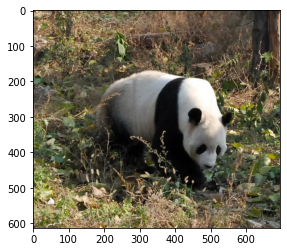

In [17]:
import matplotlib.pyplot as plt
panda = plt.imread('panda.jpg')
plt.imshow(panda)

In [0]:
# クマに似てる

【問題4】学習のためのファイルを作成
新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingの項を読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。


アノテーションファイルの形式が問題1の実装とは異なるため変換する必要があります。



### アノテーションファイルを作った

In [31]:
ls

coco_annotation.py  logs/              train_bottleneck.py  yolov3.cfg
convert.py          model_data/        train.py             yolov3-tiny.cfg
darknet53.cfg       panda.jpg          train.txt            yolov3.weights
font/               __pycache__/       voc_annotation.py    yolo_video.py
kmeans.py           README.md          yolo3/
LICENSE             simpsons_dataset/  yolo.py


## 【問題5】学習が行えることの確認  
問題4で作成したファイルを使用して学習してください。  
実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。

In [61]:
!python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-04-24 21:35:19.642979: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-04-24 21:35:19.645282: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-04-24 21:35:19.645336: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c93fd563131a): /proc/driver/nvidia/version does not exist
2020-04-24 21:35:19.645641: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-04-24 21:35:19.665834: I te

In [30]:
!python train.py

Using TensorFlow backend.








2020-04-24 22:00:40.687408: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-04-24 22:00:40.693683: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-04-24 22:00:40.693953: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2c14bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-04-24 22:00:40.693987: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-04-24 22:00:40.696662: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-04-24 22:00:40.698551: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-04-24 22:00:40.698583: I tensorflow/stream_executor/

KeyboardInterrupt: ignored

動いていると思われる。